# Part I - (2019 Nigerian Import Data Exploration)
## by (Ayobami Alaran)

<a id='analysis'></a>
## Introduction
> The data contains all basic information of goods importation to Nigeria, which consist of importers name, Freight value, cost of freight, exchange rate, importers and exporters details and so on 
The was downloaded from kaggle.
For more info on the dataset[click here](https://www.kaggle.com/datasets/godwinabah/2019-nigerian-import-data)

> The aim of this project is to explore the dataset and communicate insights using visualization.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sn

%matplotlib inline
print('Packages Imported')

Packages Imported


In [2]:
print(plt.style.available) # Checking the available visualization styles 

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
mpl.style.use(['ggplot']) # Using the ggplot2 style for all visualization

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [4]:
df = pd.read_excel('2019_NIGERIAN_IMPORT_DATA.xlsx', sheet_name='RAW DATA',
                skipfooter=2)

In [5]:
df.head()

,S/N,SCANNING_COY,PREFIX,BANK_CODE,BNK_NAM,BANK_NUMBERING,MFNUM,APP_YEAR,AUTHORIZED_DEALER_DATE,EXC_RATE,...,APPLICANT_NAME,IMPORTER_ADDRESS,IMPORTER_EMAIL,EXPORTER,EXPORTER_ADDRESS,EXPORTER_EMAIL,ITEM,Bank Code,Bank name,FOB Value Naira
0,9577,NCS,BA,214,First City Monument Bank PLC,20190001315,MF20190010578,2019,2019-01-31,0.534,...,SUNSTEEL INDUSTRIES LIMITED,"BLOCK AR, PLOT 4,OPIC RESIDENTIAL AREA 8, AGBA...",cikemelu@odenl.com,ENSCO SERVICES LIMITED,"ENSCO HOUSE, GATEWAY CRESCENT, GATEWAY BUSINES...",gnash@enscoplc.com,RIG SPARES,214.0,NaN,3.729456e+07
1,6756,NCS,BA,44,Access Bank PLC,20190000415,MF20190006942,2019,2019-01-23,311.738,...,NESTLE NIG. PLC,"INDUSTRIAL AVENUE, ILUPEJU, LAGOS, MUSHIN, LAG...",info@relchem.net,Solventek Trading DMCC,"Unit No. 3004, Jumeirah Bay tower X2, Jumeirah...",info@solventek.net,100 Metric Tons of Toluene Diisocyanate - TDI ...,44.0,NaN,1.881164e+06
2,17380,NCS,BA,23,Citibank Nigeria Limited,20190001294,MF20190018966,2019,2019-02-27,308.819,...,NESTLE NIG. PLC,"INDUSTRIAL AVENUE, ILUPEJU, LAGOS, MUSHIN, LAG...",lekan.ajewole@jubailiagrotec.com,JAT OFFSHORE S.A.L,"MAAROUF SAAD BLVD, SAIDA",jat@jat-sal.com,AGRICULTURAL INSECTICIDES,23.0,NaN,1.397662e+06
3,18398,NCS,BA,23,Citibank Nigeria Limited,20190001374,MF20190020044,2019,2019-03-01,308.819,...,NESTLE NIG. PLC,"INDUSTRIAL AVENUE, ILUPEJU, LAGOS, MUSHIN, LAG...",sylvester.umoru@ng.nestle.com,TEREOS STARCH&SWEETENERS BELGIUM N.V,Burchtstaat 10 B-9300 Aalst Belgie,cscoverseas@tereos.com,MAIZE STARCH,23.0,NaN,1.809648e+08
4,4799,NCS,BA,23,Citibank Nigeria Limited,20190002412,MF20190036985,2019,2019-04-12,308.214,...,NESTLE NIG. PLC,"INDUSTRIAL AVENUE, ILUPEJU, LAGOS, MUSHIN, LAG...",sylvester.umoru@ng.nestle.com,NESTLE SUISSE S.A.,Case Postale 352 CH-1800 Vevey CHE-116.281.710,stephane.mestres@ch.nestle.com,NAN 3 BL DHA Probio LEB027A-2 12x400g,23.0,NaN,2.037849e+07


In [6]:
df.shape

(62238, 27)

In [7]:
df.tail()

,S/N,SCANNING_COY,PREFIX,BANK_CODE,BNK_NAM,BANK_NUMBERING,MFNUM,APP_YEAR,AUTHORIZED_DEALER_DATE,EXC_RATE,...,APPLICANT_NAME,IMPORTER_ADDRESS,IMPORTER_EMAIL,EXPORTER,EXPORTER_ADDRESS,EXPORTER_EMAIL,ITEM,Bank Code,Bank name,FOB Value Naira
62233,5761,NCS,BA,35,Wema Bank PLC,20190000451,MF20190038389,2019,2019-04-16,21.9911,...,DE-OBABOB INVESTMENT LTD. CALABAR,"OLD ADIABO ROAD, IKOT EKPO, 8 MILES, CALABAR, ...",deobabob01@yahoo.com,ZHAUNS BUSINESS OPPORTUNITIES (PTY) LTD AND EN...,"257 VICTORIA ROAD, SALT RIVER C.T S.AFRICA",bizop@zhauns.com,TOILET ROLL MACHINE MODEL 1.3 AND INDUSTRIAL B...,35.0,NaN,5.668836e+06
62234,16235,NCS,BA,57,Zenith Bank PLC,20190006954,MF20190049838,2019,2019-05-16,21.4110,...,LAFARGE AFRICA PLC,"27BGERRARD ROAD, IKOYI, LAGOS, IKEJA, LAGOSLAGOS",trade.transactions.tech@lafargeholc,Martin Bulk Handling Solutions (Pty) Ltd,"Cor. Antwerpen & Arnhemsingel Street ,Die Heuw...",chantelleb@martin-eng.com,XHD REPLACEMENT BLADE ORANGE MAXIMIZER 13IN (3...,57.0,NaN,1.147635e+07
62235,20781,NCS,BA,57,Zenith Bank PLC,20190005461,MF20190039473,2019,2019-06-03,21.6970,...,DANGOTE CEMENT PLC,"HOUSE, NO. 1, ALFRED RUWANE ROAD, FALOMO, IKOY...",globaltradeservices@dangote.com,ERIEZ MAGNETICS SA PTY LTD,"30 INNES ROAD,JET PARK EXT.66 BOKSBURG GAUTENG...",ERIEZMAG@ERIEZ.COM,METAL DETECTOR,57.0,NaN,1.144916e+07
62236,31796,NCS,BA,57,Zenith Bank PLC,20190009661,MF20190068367,2019,2019-07-05,22.1540,...,LAFARGE AFRICA PLC,"27BGERRARD ROAD, IKOYI, LAGOS, IKEJA, LAGOSLAGOS",trade.transactions.tech@lafargeholc,MMD Mineral Sizing (Africa) (Pty) Ltd.,"1 Nguni Drive, Longmeadow West, Modderfontein,...",sizers@mmdafrica.co.za,Bearing Assembly,NaN,NaN,2.077864e+06
62237,37455,NCS,BA,57,Zenith Bank PLC,20190010669,MF20190074229,2019,2019-07-22,21.8701,...,HEIDELBERG NIGERIA LIMITED,"38/40, ASSOCIATION AVENUE, ILUPEJU LAGOS, ILUP...",godwin.ogilo@heidelberg-ng.com,ECO PRESSROOM PRODUCTS (PTY) LTD,"103 NEWTON STREET, MEADOWDALE EXT 2, GERMISTON...",REINETTE@ECOPRESS.CO.ZA,CHEMICALS FOR THE PRINTING INDUSTRY,NaN,NaN,7.565506e+06


## Data Cleaning 

### Need to perform data cleaning process on the dataset to drop some unwanted features in the dataset and treat the missing values in the dataset 

### Dropping some unwanted columns in the dataframe 

In [8]:
df.columns

Index(['S/N', 'SCANNING_COY', 'PREFIX', 'BANK_CODE', 'BNK_NAM',
       'BANK_NUMBERING', 'MFNUM', 'APP_YEAR', 'AUTHORIZED_DEALER_DATE',
       'EXC_RATE', 'CURRENCY', 'FOB_VAL', 'FREIGHT_VAL', 'CFR', 'USD EQUIV',
       'PAYMENT_MODE', 'APPLICANT_RCN_CODE', 'APPLICANT_NAME',
       'IMPORTER_ADDRESS', 'IMPORTER_EMAIL', 'EXPORTER', 'EXPORTER_ADDRESS',
       'EXPORTER_EMAIL', 'ITEM', 'Bank Code', 'Bank name', 'FOB Value Naira'],
      dtype='object')

In [9]:
df.drop(['BANK_NUMBERING', 'PREFIX', 'SCANNING_COY', 'Bank Code', 'Bank name', 'MFNUM', 'IMPORTER_ADDRESS', 'IMPORTER_EMAIL', 'EXPORTER_ADDRESS',
       'EXPORTER_EMAIL'], axis=1, inplace=True)
# let's view the first five elements and see how the dataframe was changed
df.head()

,S/N,BANK_CODE,BNK_NAM,APP_YEAR,AUTHORIZED_DEALER_DATE,EXC_RATE,CURRENCY,FOB_VAL,FREIGHT_VAL,CFR,USD EQUIV,PAYMENT_MODE,APPLICANT_RCN_CODE,APPLICANT_NAME,EXPORTER,ITEM,FOB Value Naira
0,9577,214,First City Monument Bank PLC,2019,2019-01-31,0.534,CFA,69840000.00,745000.0,70585000.00,119337.353650,Bills for Collection,16298228-0001,SUNSTEEL INDUSTRIES LIMITED,ENSCO SERVICES LIMITED,RIG SPARES,3.729456e+07
1,6756,44,Access Bank PLC,2019,2019-01-23,311.738,CHF,6034.44,1260.0,7294.44,7569.002722,Bills for Collection,00389604-0001,NESTLE NIG. PLC,Solventek Trading DMCC,100 Metric Tons of Toluene Diisocyanate - TDI ...,1.881164e+06
2,17380,23,Citibank Nigeria Limited,2019,2019-02-27,308.819,CHF,4525.83,945.0,5470.83,5676.752041,Bills for Collection,00389604-0001,NESTLE NIG. PLC,JAT OFFSHORE S.A.L,AGRICULTURAL INSECTICIDES,1.397662e+06
3,18398,23,Citibank Nigeria Limited,2019,2019-03-01,308.819,CHF,585990.00,10221.0,596211.00,618652.382040,Bills for Collection,00389604-0001,NESTLE NIG. PLC,TEREOS STARCH&SWEETENERS BELGIUM N.V,MAIZE STARCH,1.809648e+08
4,4799,23,Citibank Nigeria Limited,2019,2019-04-12,308.214,CHF,66118.00,1125.0,67243.00,69774.026520,Bills for Collection,00389604-0001,NESTLE NIG. PLC,NESTLE SUISSE S.A.,NAN 3 BL DHA Probio LEB027A-2 12x400g,2.037849e+07


In [10]:
df.shape

(62238, 17)

In [11]:
df.columns

Index(['S/N', 'BANK_CODE', 'BNK_NAM', 'APP_YEAR', 'AUTHORIZED_DEALER_DATE',
       'EXC_RATE', 'CURRENCY', 'FOB_VAL', 'FREIGHT_VAL', 'CFR', 'USD EQUIV',
       'PAYMENT_MODE', 'APPLICANT_RCN_CODE', 'APPLICANT_NAME', 'EXPORTER',
       'ITEM', 'FOB Value Naira'],
      dtype='object')

### What is the structure of your dataset?

> 62238 observations and 17 variables

### What is/are the main feature(s) of interest in your dataset?

> Bank name, exchange rate, application year, authorised dealer date, currency, free on board values, cost and freight, freight value.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> FOB_VAL, FOB Value Naira and EXC_RATE

### Need to fix the naming convention by renaming some columnsin the dataframe

In [12]:
df.rename(columns={'USD EQUIV':'USD_EQUIV', 'FOB Value Naira':'FOB_Value_Naira'}, inplace=True) #renaming the columns
df.head()

,S/N,BANK_CODE,BNK_NAM,APP_YEAR,AUTHORIZED_DEALER_DATE,EXC_RATE,CURRENCY,FOB_VAL,FREIGHT_VAL,CFR,USD_EQUIV,PAYMENT_MODE,APPLICANT_RCN_CODE,APPLICANT_NAME,EXPORTER,ITEM,FOB_Value_Naira
0,9577,214,First City Monument Bank PLC,2019,2019-01-31,0.534,CFA,69840000.00,745000.0,70585000.00,119337.353650,Bills for Collection,16298228-0001,SUNSTEEL INDUSTRIES LIMITED,ENSCO SERVICES LIMITED,RIG SPARES,3.729456e+07
1,6756,44,Access Bank PLC,2019,2019-01-23,311.738,CHF,6034.44,1260.0,7294.44,7569.002722,Bills for Collection,00389604-0001,NESTLE NIG. PLC,Solventek Trading DMCC,100 Metric Tons of Toluene Diisocyanate - TDI ...,1.881164e+06
2,17380,23,Citibank Nigeria Limited,2019,2019-02-27,308.819,CHF,4525.83,945.0,5470.83,5676.752041,Bills for Collection,00389604-0001,NESTLE NIG. PLC,JAT OFFSHORE S.A.L,AGRICULTURAL INSECTICIDES,1.397662e+06
3,18398,23,Citibank Nigeria Limited,2019,2019-03-01,308.819,CHF,585990.00,10221.0,596211.00,618652.382040,Bills for Collection,00389604-0001,NESTLE NIG. PLC,TEREOS STARCH&SWEETENERS BELGIUM N.V,MAIZE STARCH,1.809648e+08
4,4799,23,Citibank Nigeria Limited,2019,2019-04-12,308.214,CHF,66118.00,1125.0,67243.00,69774.026520,Bills for Collection,00389604-0001,NESTLE NIG. PLC,NESTLE SUISSE S.A.,NAN 3 BL DHA Probio LEB027A-2 12x400g,2.037849e+07


In [13]:
df.isnull().sum() # Checking for misssing vales 

S/N                       0
BANK_CODE                 0
BNK_NAM                   0
APP_YEAR                  0
AUTHORIZED_DEALER_DATE    0
EXC_RATE                  0
CURRENCY                  0
FOB_VAL                   0
FREIGHT_VAL               0
CFR                       0
USD_EQUIV                 0
PAYMENT_MODE              0
APPLICANT_RCN_CODE        0
APPLICANT_NAME            0
EXPORTER                  0
ITEM                      1
FOB_Value_Naira           0
dtype: int64

In [14]:
df.dropna() # dropping the missing value row from the dataset

,S/N,BANK_CODE,BNK_NAM,APP_YEAR,AUTHORIZED_DEALER_DATE,EXC_RATE,CURRENCY,FOB_VAL,FREIGHT_VAL,CFR,USD_EQUIV,PAYMENT_MODE,APPLICANT_RCN_CODE,APPLICANT_NAME,EXPORTER,ITEM,FOB_Value_Naira
0,9577,214,First City Monument Bank PLC,2019,2019-01-31,0.5340,CFA,69840000.00,745000.00,70585000.00,119337.353650,Bills for Collection,16298228-0001,SUNSTEEL INDUSTRIES LIMITED,ENSCO SERVICES LIMITED,RIG SPARES,3.729456e+07
1,6756,44,Access Bank PLC,2019,2019-01-23,311.7380,CHF,6034.44,1260.00,7294.44,7569.002722,Bills for Collection,00389604-0001,NESTLE NIG. PLC,Solventek Trading DMCC,100 Metric Tons of Toluene Diisocyanate - TDI ...,1.881164e+06
2,17380,23,Citibank Nigeria Limited,2019,2019-02-27,308.8190,CHF,4525.83,945.00,5470.83,5676.752041,Bills for Collection,00389604-0001,NESTLE NIG. PLC,JAT OFFSHORE S.A.L,AGRICULTURAL INSECTICIDES,1.397662e+06
3,18398,23,Citibank Nigeria Limited,2019,2019-03-01,308.8190,CHF,585990.00,10221.00,596211.00,618652.382040,Bills for Collection,00389604-0001,NESTLE NIG. PLC,TEREOS STARCH&SWEETENERS BELGIUM N.V,MAIZE STARCH,1.809648e+08
4,4799,23,Citibank Nigeria Limited,2019,2019-04-12,308.2140,CHF,66118.00,1125.00,67243.00,69774.026520,Bills for Collection,00389604-0001,NESTLE NIG. PLC,NESTLE SUISSE S.A.,NAN 3 BL DHA Probio LEB027A-2 12x400g,2.037849e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62233,5761,35,Wema Bank PLC,2019,2019-04-16,21.9911,ZAR,257778.66,55000.00,312778.66,20784.454736,Letters of Credit,10173169-0001,DE-OBABOB INVESTMENT LTD. CALABAR,ZHAUNS BUSINESS OPPORTUNITIES (PTY) LTD AND EN...,TOILET ROLL MACHINE MODEL 1.3 AND INDUSTRIAL B...,5.668836e+06
62234,16235,57,Zenith Bank PLC,2019,2019-05-16,21.4110,ZAR,536002.50,41000.00,577002.50,38342.393127,Letters of Credit,01057508-0001,LAFARGE AFRICA PLC,Martin Bulk Handling Solutions (Pty) Ltd,XHD REPLACEMENT BLADE ORANGE MAXIMIZER 13IN (3...,1.147635e+07
62235,20781,57,Zenith Bank PLC,2019,2019-06-03,21.6970,ZAR,527684.00,48376.00,576060.00,38279.763060,Letters of Credit,04059106-0001,DANGOTE CEMENT PLC,ERIEZ MAGNETICS SA PTY LTD,METAL DETECTOR,1.144916e+07
62236,31796,57,Zenith Bank PLC,2019,2019-07-05,22.1540,ZAR,93791.80,6228.67,100020.47,6646.460252,Letters of Credit,01057508-0001,LAFARGE AFRICA PLC,MMD Mineral Sizing (Africa) (Pty) Ltd.,Bearing Assembly,2.077864e+06


In [15]:
df.dtypes

S/N                                int64
BANK_CODE                          int64
BNK_NAM                           object
APP_YEAR                           int64
AUTHORIZED_DEALER_DATE    datetime64[ns]
EXC_RATE                         float64
CURRENCY                          object
FOB_VAL                          float64
FREIGHT_VAL                      float64
CFR                              float64
USD_EQUIV                        float64
PAYMENT_MODE                      object
APPLICANT_RCN_CODE                object
APPLICANT_NAME                    object
EXPORTER                          object
ITEM                              object
FOB_Value_Naira                  float64
dtype: object

## Univariate Exploration


In [16]:
df.describe() # checking the summary statistics of the numeric features in the dataset

,S/N,BANK_CODE,APP_YEAR,EXC_RATE,FOB_VAL,FREIGHT_VAL,CFR,USD_EQUIV,FOB_Value_Naira
count,62238.000000,62238.000000,62238.0,62238.000000,6.223800e+04,6.223800e+04,6.223800e+04,6.223800e+04,6.223800e+04
mean,36081.851232,78.550757,2019.0,317.532525,4.261340e+05,3.840211e+04,4.645362e+05,3.853367e+05,1.114438e+08
std,25366.821444,74.796830,0.0,37.431839,2.506017e+06,2.263975e+05,2.664023e+06,1.818331e+06,5.454166e+08
min,1.000000,11.000000,2019.0,0.534000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,14448.250000,35.000000,2019.0,306.950000,3.472907e+04,2.700000e+03,3.900050e+04,3.931820e+04,1.102772e+07
50%,28869.000000,57.000000,2019.0,326.000000,8.868400e+04,6.000000e+03,9.702000e+04,9.700000e+04,2.798929e+07
75%,57668.750000,68.000000,2019.0,326.000000,2.324000e+05,1.819125e+04,2.520000e+05,2.475000e+05,7.180290e+07
max,86390.000000,561.000000,2019.0,430.000000,2.180500e+08,1.664500e+07,2.263500e+08,2.263500e+08,6.670149e+10


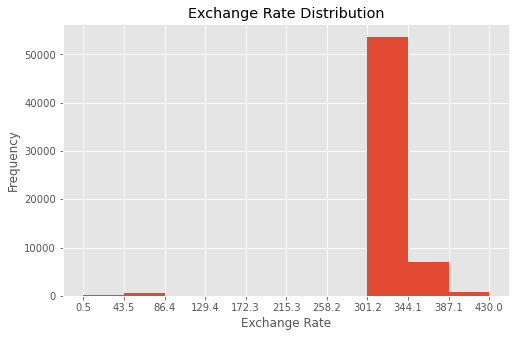

In [17]:
# Plotting histogram for exchange rate in the dataset
count, bin_edges = np.histogram(df['EXC_RATE']) # the numpy histogram function is used to get the bin edges and count for each bin intervals
df['EXC_RATE'].plot(kind='hist', figsize=(8,5), xticks=bin_edges);
plt.title('Exchange Rate Distribution')
plt.xlabel('Exchange Rate')
plt.show()

From viz above the, we see that the exchange rate frequency is slightly skewed to the right, however need more visual exploration to confirm this is true 

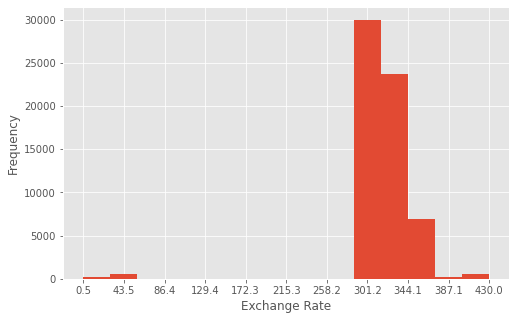

In [18]:
count, bin_edges = np.histogram(df['EXC_RATE'], 10)
df['EXC_RATE'].plot(kind='hist', figsize=(8,5), xticks=bin_edges,
                   bins=15); # Here the bin is increased from to 10 to further explore the distribution
plt.xlabel('Exchange Rate')
plt.show()

The viz still not showing much, lets create bins from the data point min and max 



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

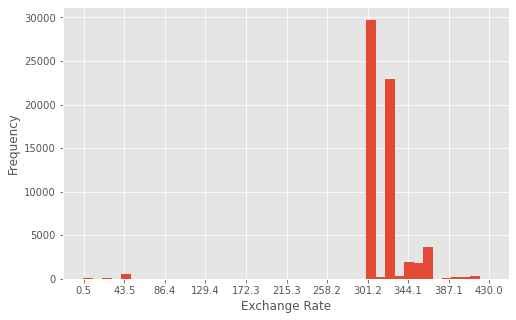

In [19]:
# creating bins from the exchange rate data point using numpy arrange to generate array of bin starting from 
# 0 to max of exchange rate plus the default bin size which is 10 and step 10
binsize = 10
bins = np.arange(0, df['EXC_RATE'].max()+binsize, binsize)
count, bin_edges = np.histogram(df['EXC_RATE'])
df['EXC_RATE'].plot(kind='hist', figsize=(8,5), xticks=bin_edges,
                   bins=bins);
plt.xlabel('Exchange Rate')
plt.show()

Voila, the 3 visuals plotted has helped to confimr that the exchange rate distribution is slighlty right skewed

Text(0.5, 0, 'FOB value in different currencies')

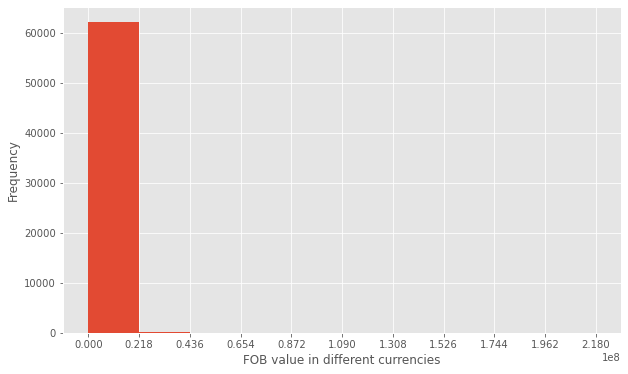

In [20]:
# Plotting the histogram for fob value for different currencies
plt.figure(figsize=(10,6))
# plt.subplot(1, 2, 1)
# binsize = 1000000
count, bin_edges = np.histogram(df['FOB_VAL'])
df['FOB_VAL'].plot(kind='hist', xticks=bin_edges,
                   bins=10);
# plt.xscale('log')
plt.xlabel('FOB value in different currencies')



This visual shows that the distribution for the free on board frequency is skewed to the right, but my guts tells me this isn't right because there seem to be high spread between the data points.
Thus need to try something else to explore this data distribution with visualisation 

In [21]:
# lets check the bins frequency and edges 
print(count)
print(bin_edges)

[62139    67    13    13     2     0     1     1     0     2]
[0.00000e+00 2.18050e+07 4.36100e+07 6.54150e+07 8.72200e+07 1.09025e+08
 1.30830e+08 1.52635e+08 1.74440e+08 1.96245e+08 2.18050e+08]


Wow!, this shows that almost all data points falls between 0 to 20 million and we have the max to somewhat 220 million
Big difference! 
So lets try something else, which is normalizing the values using numpy logarithm and logarithm scale

Text(0.5, 0, 'FOB value in different currencies')

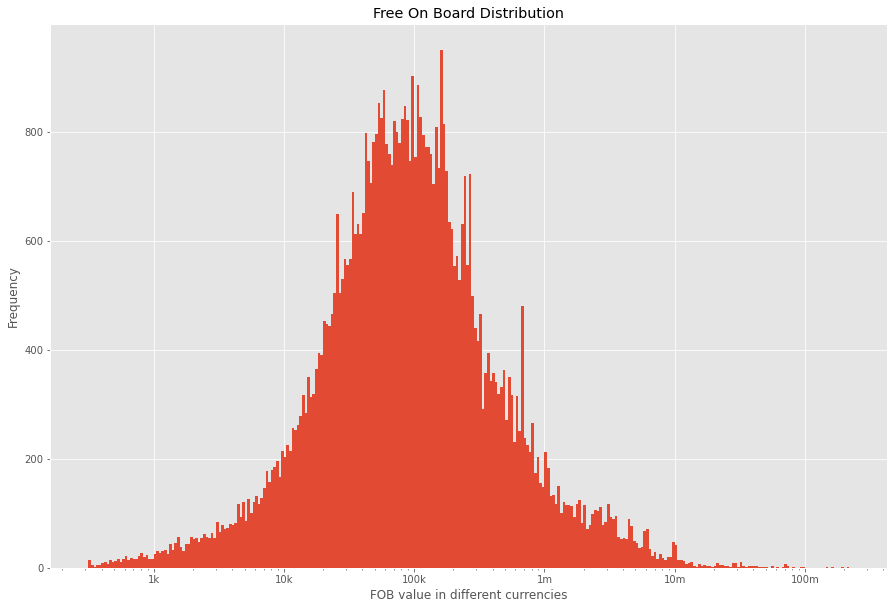

In [22]:
plt.figure(figsize=(15,10))
log_binsize = 0.020
bins = 10 ** np.arange(2.5, np.log10(df['FOB_VAL'].max())+log_binsize, log_binsize) # logging the max data point and adding the log binsize
count, bin_edges = np.histogram(df['FOB_VAL'])
df['FOB_VAL'].plot(kind='hist',
                   bins=bins);
plt.xscale('log')
plt.xticks([1e3, 1e4, 1e5, 1e6, 1e7, 1e8], ['1k', '10k', '100k', '1m', '10m', '100m']) # renaming the xticks 
plt.title('Free On Board Distribution')
plt.xlabel('FOB value in different currencies')


The data viz above has clearly show that the fob value is uniformly distributed on a logarithm scale 

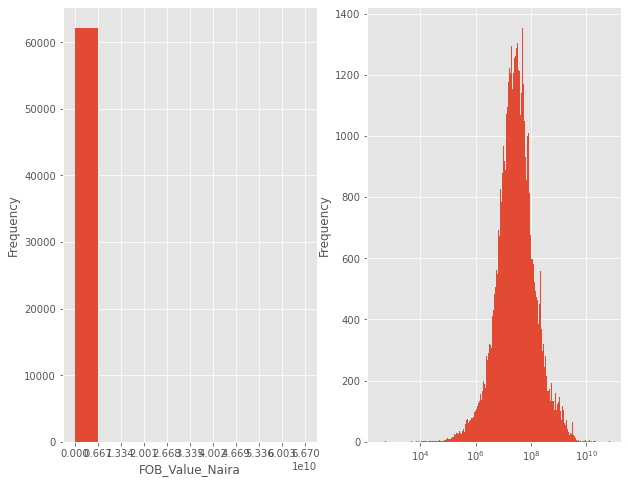

In [23]:
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
count_1, bin_edges_1 = np.histogram(df['FOB_Value_Naira']) # the numpy histogram function is used to get the bin edges and count for each bin intervals
df['FOB_Value_Naira'].plot(kind='hist', xticks=bin_edges_1);
plt.xlabel('FOB_Value_Naira')
plt.subplot(1, 2, 2)
log_binsize = 0.030
bins = 10 ** np.arange(2.5, np.log10(df['FOB_Value_Naira'].max())+log_binsize, log_binsize) # logging the max data point and adding the log binsize
# count, bin_edges = np.histogram(df['FOB_Value_Naira'])
df['FOB_Value_Naira'].plot(kind='hist',
                   bins=bins);
plt.xscale('log')
plt.show()

From the this data we can see that after logging the x ticks we get a normal distribution which might be skewed to the left or not

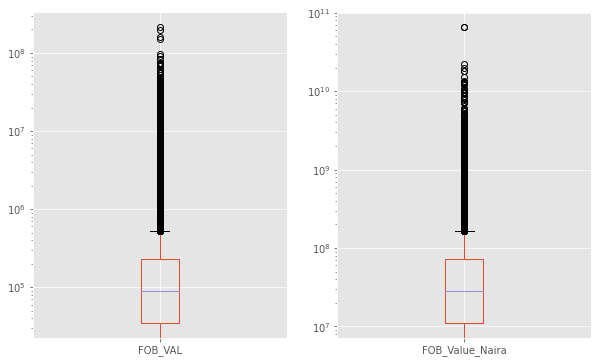

In [24]:
fig = plt.figure(figsize=(10,6))

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2)
ax0.set_yscale('log')
ax1.set_yscale('log')
df.boxplot(column='FOB_VAL', ax=ax0)
df.boxplot(column='FOB_Value_Naira', ax=ax1);

The visualisation above shows the summary statistics of free on board values for different currencies and nigerian naira

In [25]:
def barchart(dataframe, X, rot=0):
    sn.countplot(data=dataframe, x=X)
    sn.set_style('whitegrid')
    plt.xticks(rotation=rot)
    
    

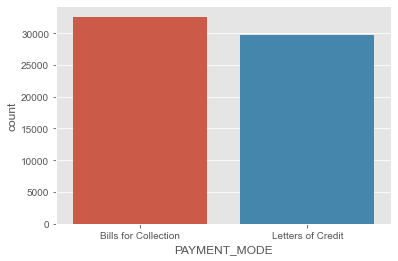

In [26]:
barchart(df, 'PAYMENT_MODE')



The payment method bills for collection count is slightly more than letters of credit, that is, it seems importers prefers bills for collection more than letters for credit.
Further investifation will check if there is a relationship between the cost of freight and mode of payment

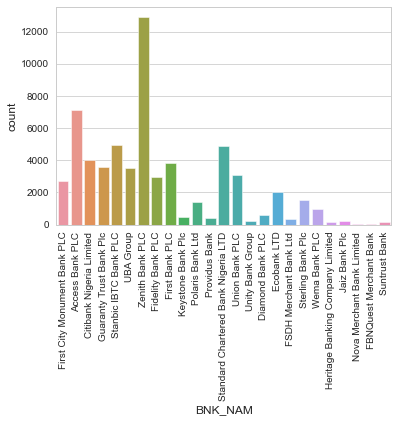

In [27]:
barchart(df, 'BNK_NAM', 90)

This visualisation shows the frequency distribution of the banks used for payments

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> So at first the exhange rate distribution was rightly skewed, but after i logged the x scale, it turns out to be normally 
distributed
> Same for the free on board value too
> The boxplot show the summary statistics and i see there are lot of outliers and i had to go back to my data and check 
max data point and used excel to visualy assessed the data and then i noticed that this is a monetary data so
the outliers doesnt really need fixing

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Nothing much just the outliers and i only assessed the data points and did nothing about it when i see there are
different exchange rate and currencies in the dataset

## Bivariate Exploration


Text(0, 0.5, 'Free on Board Value')

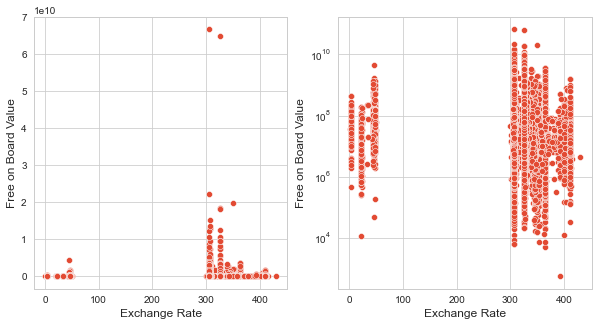

In [28]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sn.scatterplot(x= "EXC_RATE", y='FOB_Value_Naira', data=df);
plt.xlabel('Exchange Rate')
plt.ylabel('Free on Board Value')
plt.subplot(1, 2, 2)
sn.scatterplot(x= "EXC_RATE", y='FOB_Value_Naira', data=df);
plt.xlabel('Exchange Rate')
plt.yscale('log')
plt.ylabel('Free on Board Value')

The left side visualisation shows the relationship between exchange rate and free on board value and the shows the same but with a log scale on the y axis.
Thus, from the visualisation it is clear that there is relationship between the two numerical variables 

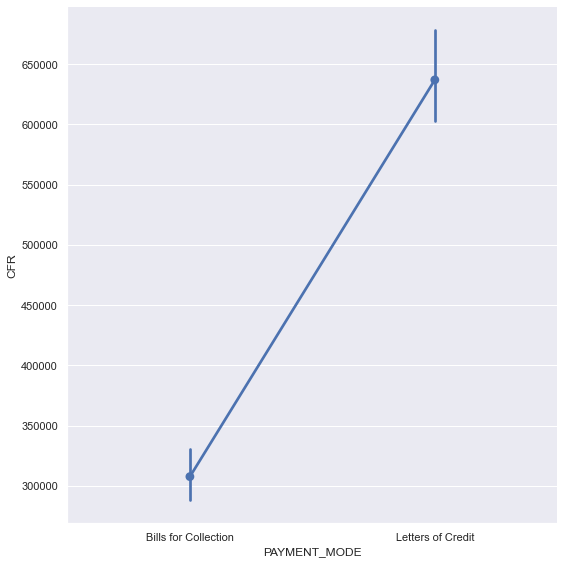

In [29]:
# plt.figure(figsize=(15,12))
# sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_theme(style="darkgrid")
g = sn.catplot(x='PAYMENT_MODE', y='CFR', data=df, 
kind='point', height=8)

This visual shows the average distribution of the payment mode for the cost of freigt.
Therefore, we can see that the mean cost of freight for Bills for collection is between 300000 - 350000 and letters for credit has the mean cost of freight is 600000 - 650000, big differnce right?.
So this might be saying that the importers might prefer letters for credit for higher cost of freight.
However, no conclusion will be made yet, so further exploration will help get more insights on this. 

In [30]:
df.columns

Index(['S/N', 'BANK_CODE', 'BNK_NAM', 'APP_YEAR', 'AUTHORIZED_DEALER_DATE',
       'EXC_RATE', 'CURRENCY', 'FOB_VAL', 'FREIGHT_VAL', 'CFR', 'USD_EQUIV',
       'PAYMENT_MODE', 'APPLICANT_RCN_CODE', 'APPLICANT_NAME', 'EXPORTER',
       'ITEM', 'FOB_Value_Naira'],
      dtype='object')

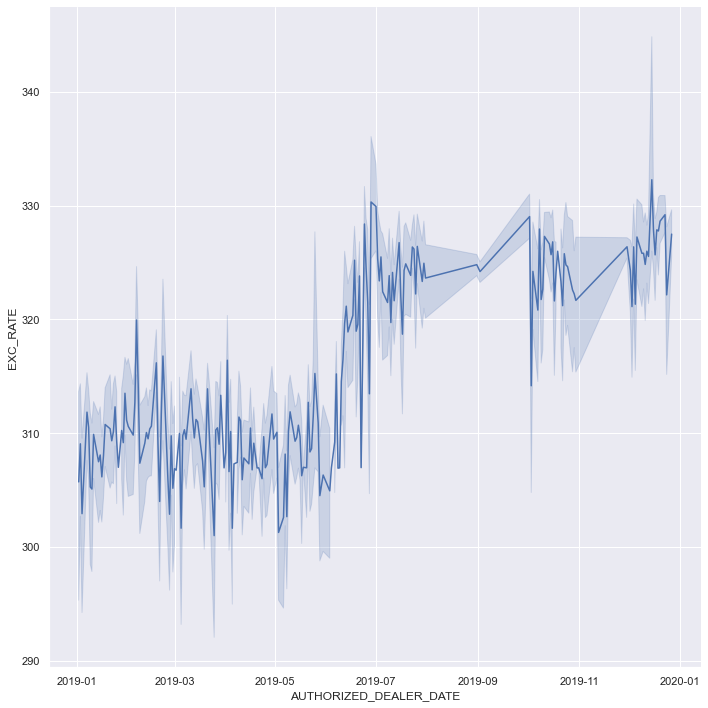

In [31]:
sn.set_theme(style="darkgrid")
g = sn.relplot(x='AUTHORIZED_DEALER_DATE', y='EXC_RATE', data=df,
kind='line', height=10)

This exploration just shows the trend of the exchange rate overtime for all currency rates, so this tells us that the exchange
is ranging overtime and a slight uptrend. 
However, this might not be really clear for insights and insights from this might be biased because there are couple of currencies in the dataset with different rates. 
So further investigation will help with this. 

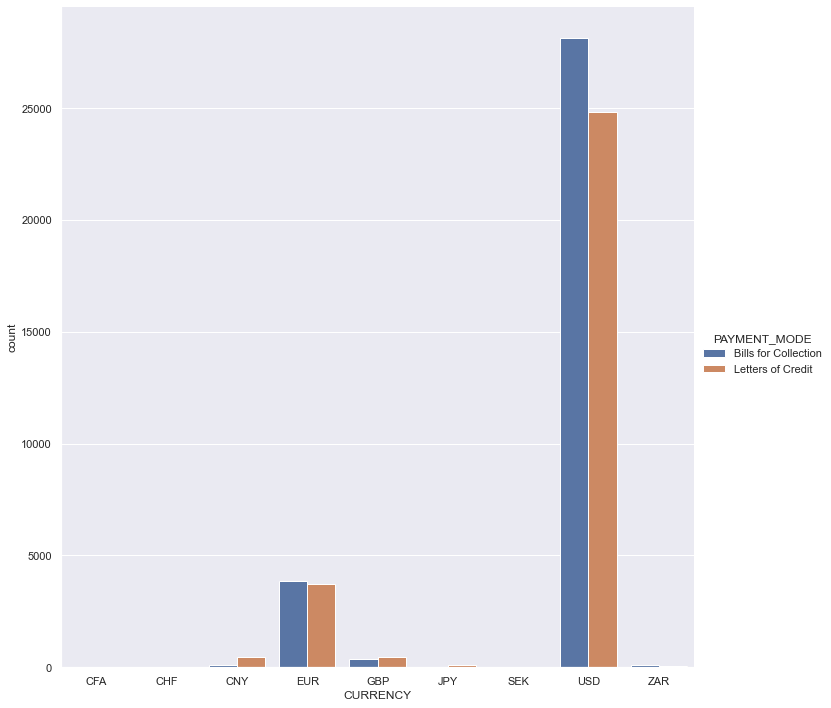

In [32]:
sn.catplot(x='CURRENCY', data=df,
hue='PAYMENT_MODE', kind='count', height=10);

This viz shows the currencies count per mode of payment, here we can see that usd is the currency made for payment and a slight difference between the two payment mode

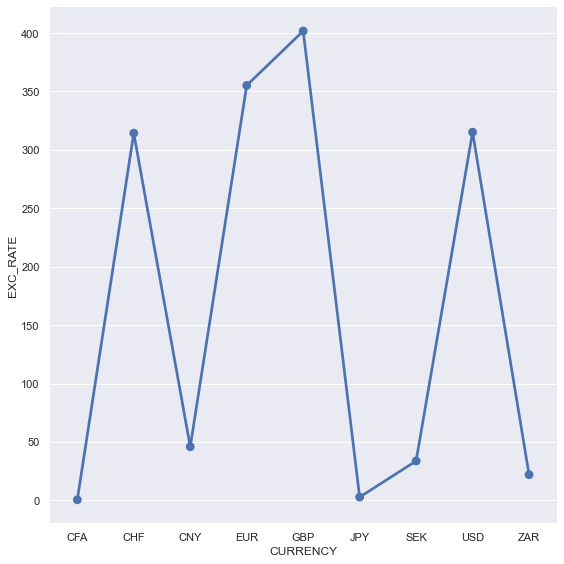

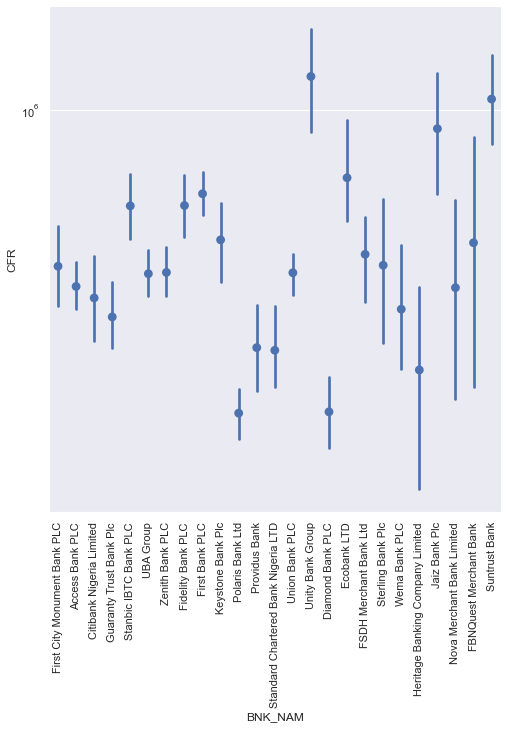

In [34]:
sn.catplot(data=df, x='CURRENCY', y='EXC_RATE', kind='point', height=8)
sn.catplot(x='BNK_NAM', y="CFR", data=df, kind='point', join=False, height=8)
# plt.ylim(0, 10e4)
plt.xticks(rotation=90)
plt.yscale('log');

The first viz here shows the currencies per exchange rate this is used to explore the exchange rate for all currencies in the distribution.
The second viz shows the banks in x axis and cost of freight on y axis with and exponential scale, which clearly shows union bank here has the highest cost of freight.

In [35]:
df_currency = df.groupby('CURRENCY', axis=0).sum()

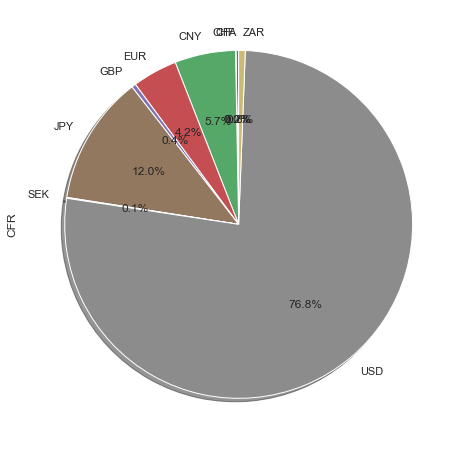

In [36]:
df_currency['CFR'].plot(kind='pie',
                            figsize=(10, 8),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90°
                            shadow=True);      # add shadow     )

Oh!, not cool right?
Well, just exploring, so now i know that usd has the highest proportion for cost of freight 

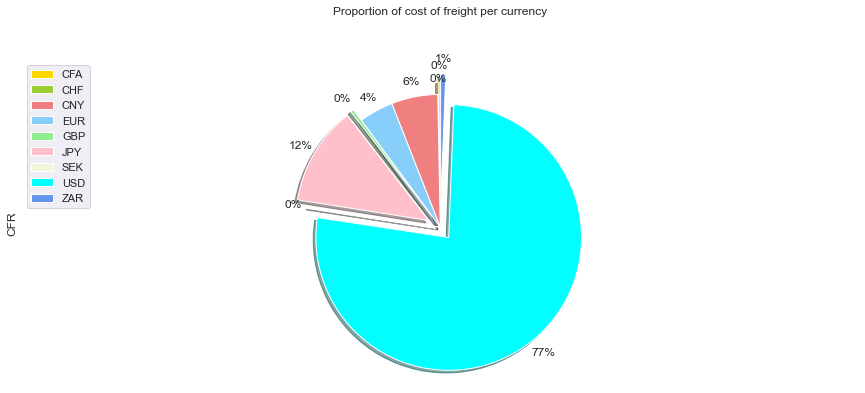

In [55]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'beige', 'aqua', 'cornflowerblue']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1, 0, 0.1, 0.15] # ratio for each currency with which to offset each wedge.

df_currency['CFR'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.0f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 currencies
                            )

# scale the title up by 12% to match pctdistance
plt.title('Proportion of cost of freight per currency', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_currency.index, loc='upper left') 

Now this cooler and clearer, with 77% usd currency used for freight charges

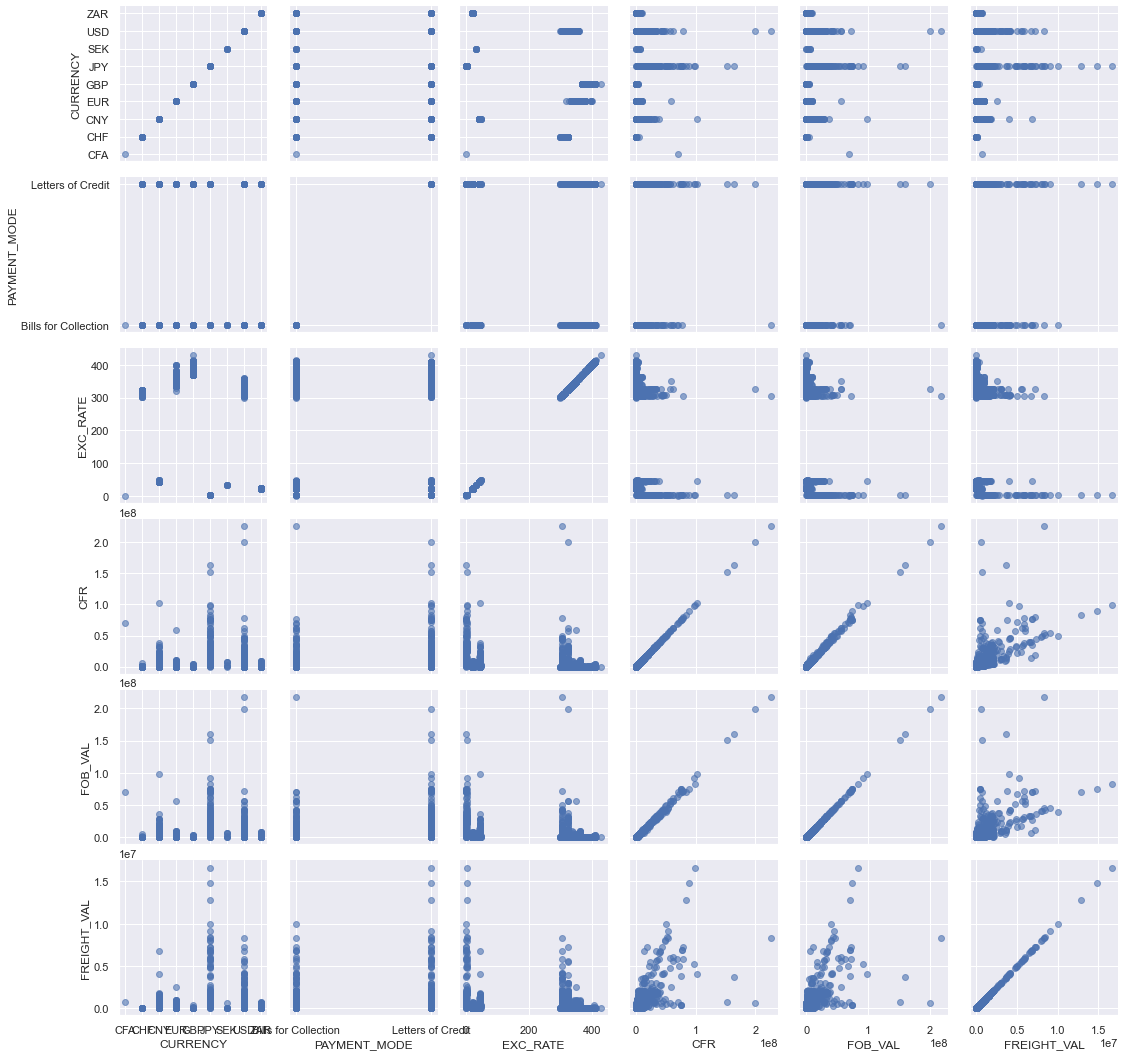

In [37]:
g = sn.PairGrid(df, vars=['CURRENCY', 'PAYMENT_MODE', 'EXC_RATE', 'CFR', 'FOB_VAL', 'FREIGHT_VAL'], palette='RbBu_r')
g.map(plt.scatter, alpha=0.6)


This data viz shows the relationships across different variables selected, so this is more like a correlation plot but not heatmap, this just help me see variables that are correlated easily across the selected variables.

Text(0.5, 1.0, 'Relationship between Cost of freight and Free on board value')

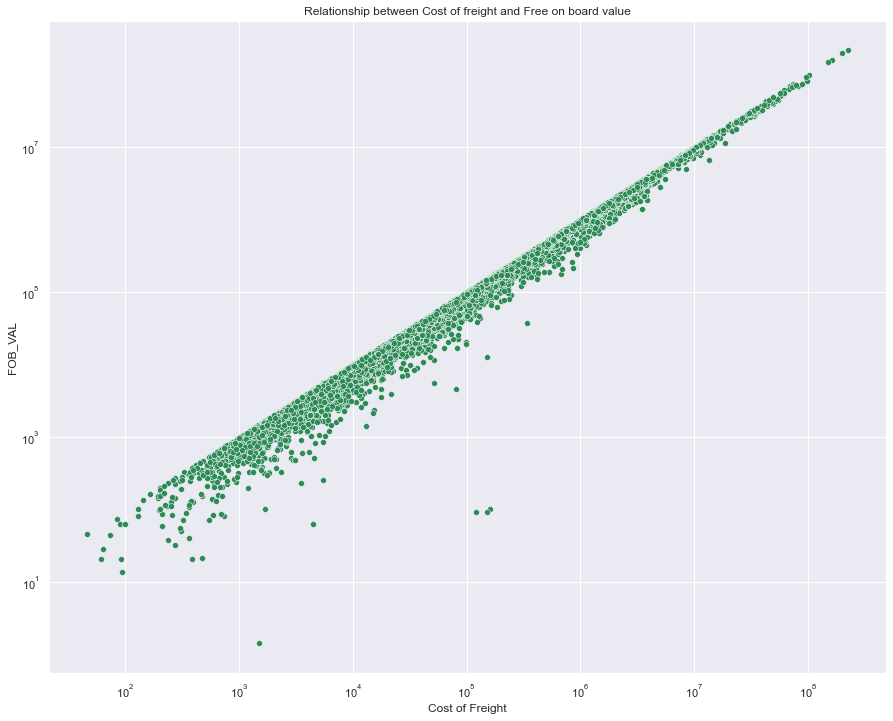

In [38]:
plt.figure(figsize=(15,12))
sn.scatterplot(x='CFR', y='FOB_VAL', data=df, color='seagreen')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Cost of Freight')
plt.title('Relationship between Cost of freight and Free on board value')

So from my above parigrid plot i see that cfr and fob values are strongly correlated, so i need to take a good look at it
while changing the x and y scale 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Well, i see that only few of my variables are related and most are not related from the above visuals
 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The CFR and FOB VAl are strongly correlated and also the exchange rate tends to increase over time 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

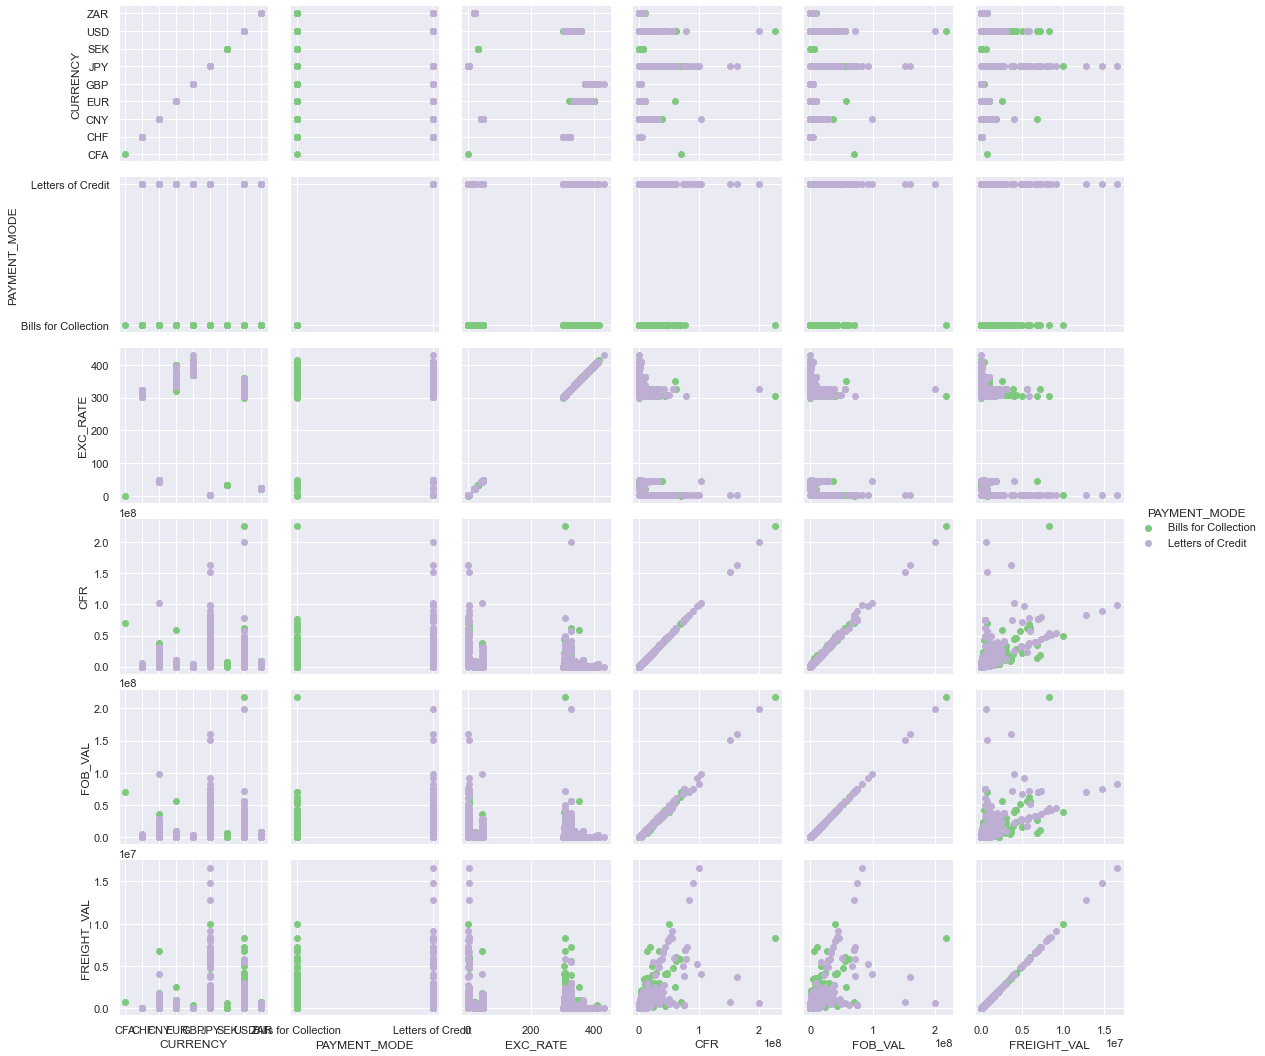

In [39]:
sn.set_style('darkgrid')
g = sn.PairGrid(df, vars=['CURRENCY', 'PAYMENT_MODE', 'EXC_RATE', 'CFR', 'FOB_VAL', 'FREIGHT_VAL'], hue="PAYMENT_MODE", palette='Accent')
g.map(plt.scatter)
g.add_legend()

In [40]:
df_new = df.loc[:, ['FREIGHT_VAL', 'CFR', 'EXC_RATE', 'FOB_VAL', 'CURRENCY']] # creating a new subset of the date
df_new.head()

,FREIGHT_VAL,CFR,EXC_RATE,FOB_VAL,CURRENCY
0,745000.0,70585000.00,0.534,69840000.00,CFA
1,1260.0,7294.44,311.738,6034.44,CHF
2,945.0,5470.83,308.819,4525.83,CHF
3,10221.0,596211.00,308.819,585990.00,CHF
4,1125.0,67243.00,308.214,66118.00,CHF


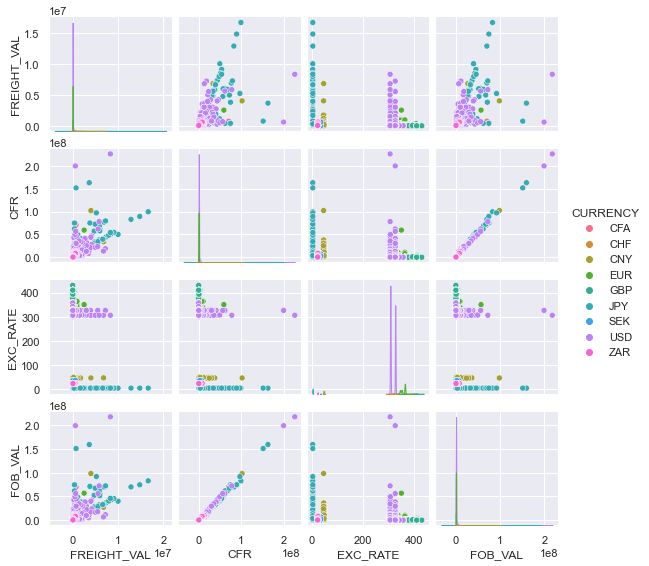

In [41]:
sn.set_style('darkgrid')
sn.set_palette('Accent')
sn.pairplot(df_new, hue='CURRENCY', height=2.0)

This visual shows the pairplot for the numeric variables in the dataset on each currency which an histogram on the diagonal.

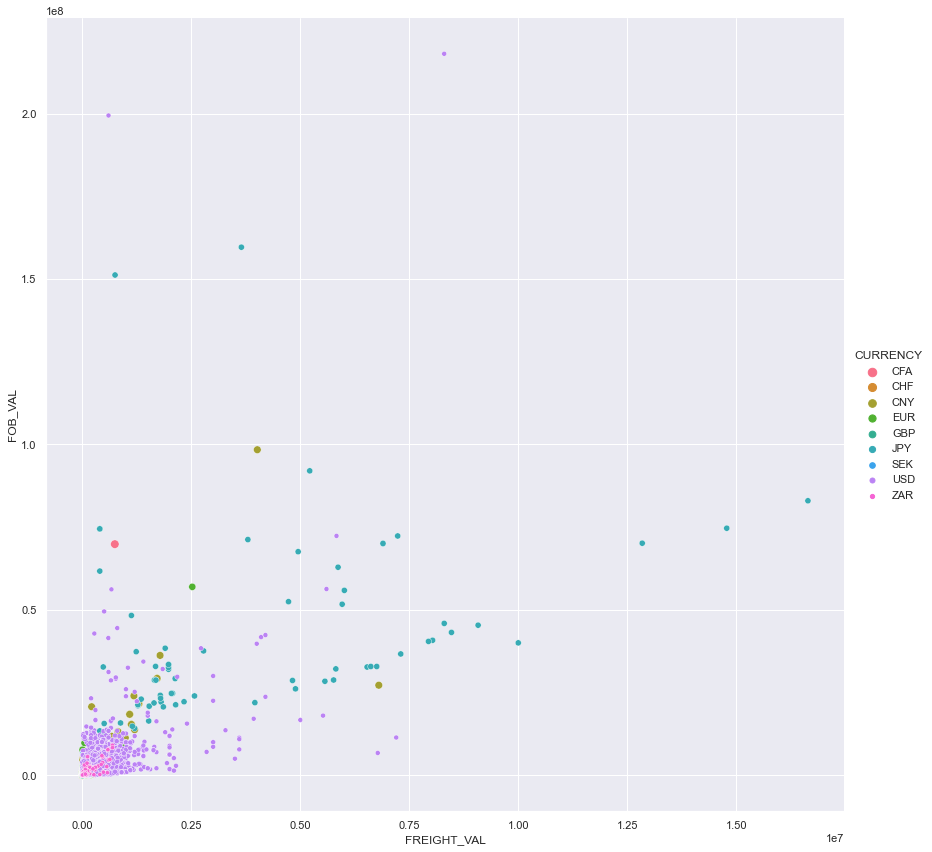

In [42]:
sn.relplot(x='FREIGHT_VAL', y='FOB_VAL', data=df,
           kind='scatter', hue='CURRENCY', size='CURRENCY', height=12)

This scatter plot shows the relationship between freight and fob val on currency.
However, this plot doesnt show clear relationship because the data points seems to be clustered

Text(0.5, 1.0, 'Relationship between Free on board value and freight value per currency')

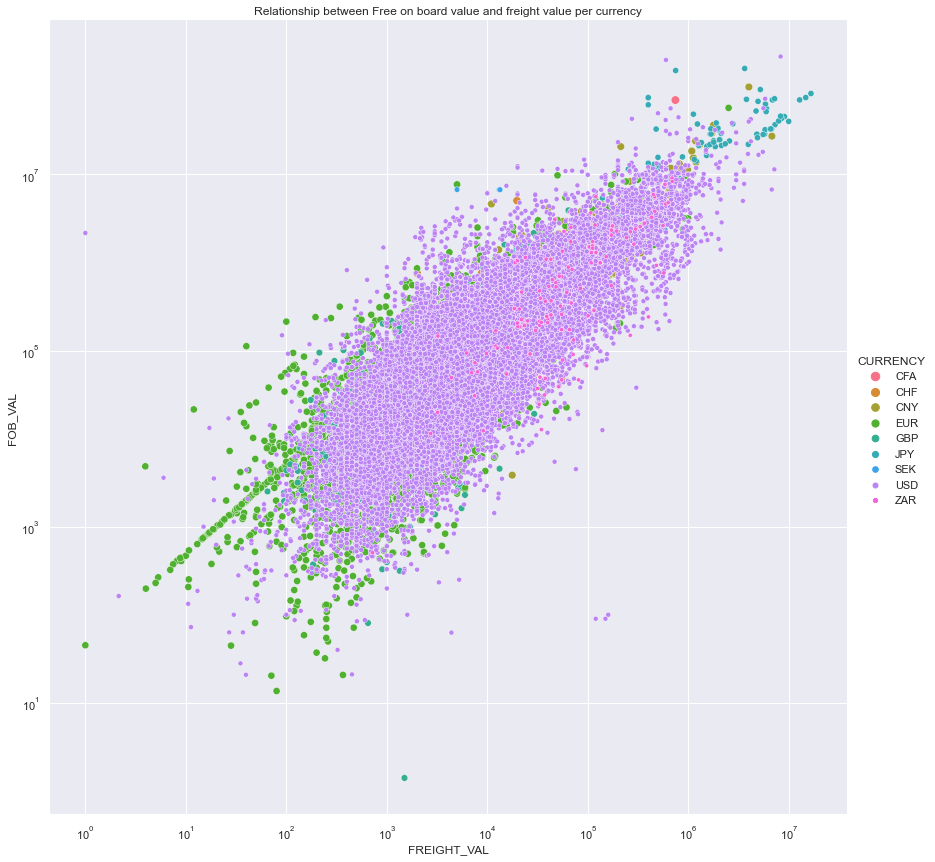

In [43]:
sn.relplot(x='FREIGHT_VAL', y='FOB_VAL', data=df,
           kind='scatter', hue='CURRENCY', size='CURRENCY', height=12);
plt.xscale('log')
plt.yscale('log')
plt.title('Relationship between Free on board value and freight value per currency')

Better now, this shows clear relationship due to the fact that the y and x scale has been loged, by calling the log parameter
in plt scale function

Text(0.5, 1.0, 'Relationship between Free on board value and freight value per currency')

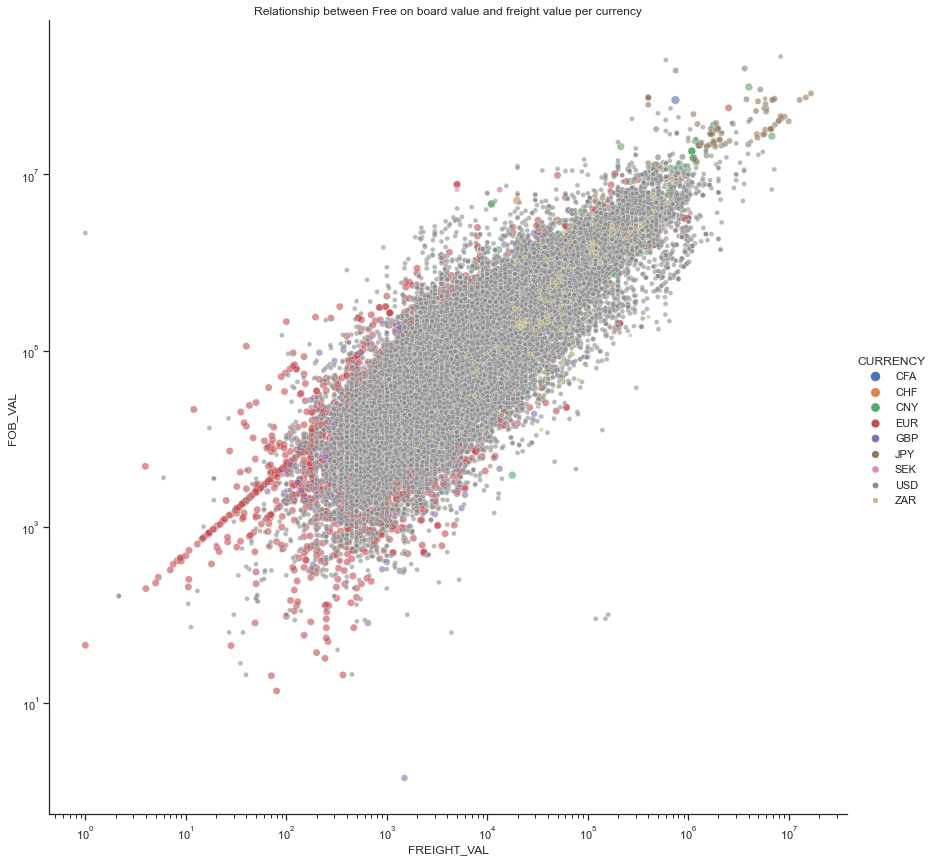

In [44]:
sn.set_theme(style="ticks")
sn.relplot(x='FREIGHT_VAL', y='FOB_VAL', data=df,
           kind='scatter', hue='CURRENCY', size='CURRENCY', height=12,
          alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.title('Relationship between Free on board value and freight value per currency')

Changed the transparency to give a clearer picture 

Text(0.5, 1.0, 'Relationship between Free on board value and freight value per currency')

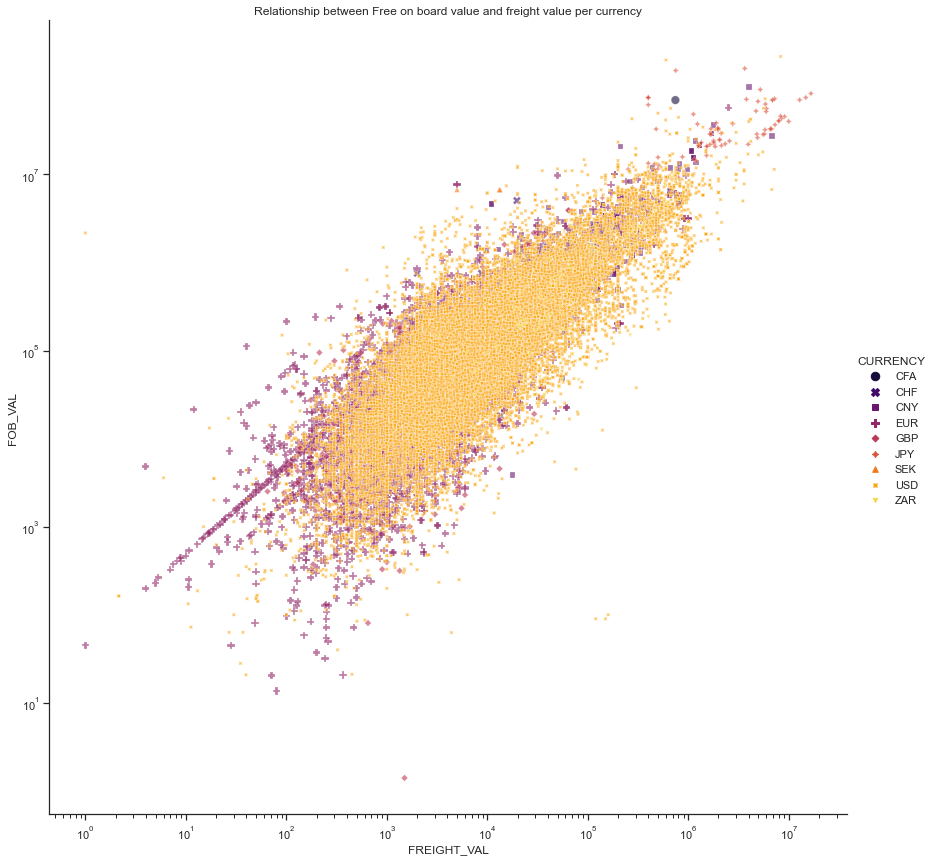

In [45]:
sn.set_theme(style="ticks")
sn.relplot(x='FREIGHT_VAL', y='FOB_VAL', data=df,
           kind='scatter', hue='CURRENCY', size='CURRENCY', height=12,
          alpha=0.6, palette='inferno', style='CURRENCY')
plt.xscale('log')
plt.yscale('log')
plt.title('Relationship between Free on board value and freight value per currency')

Added more aesthetics to give better insights 

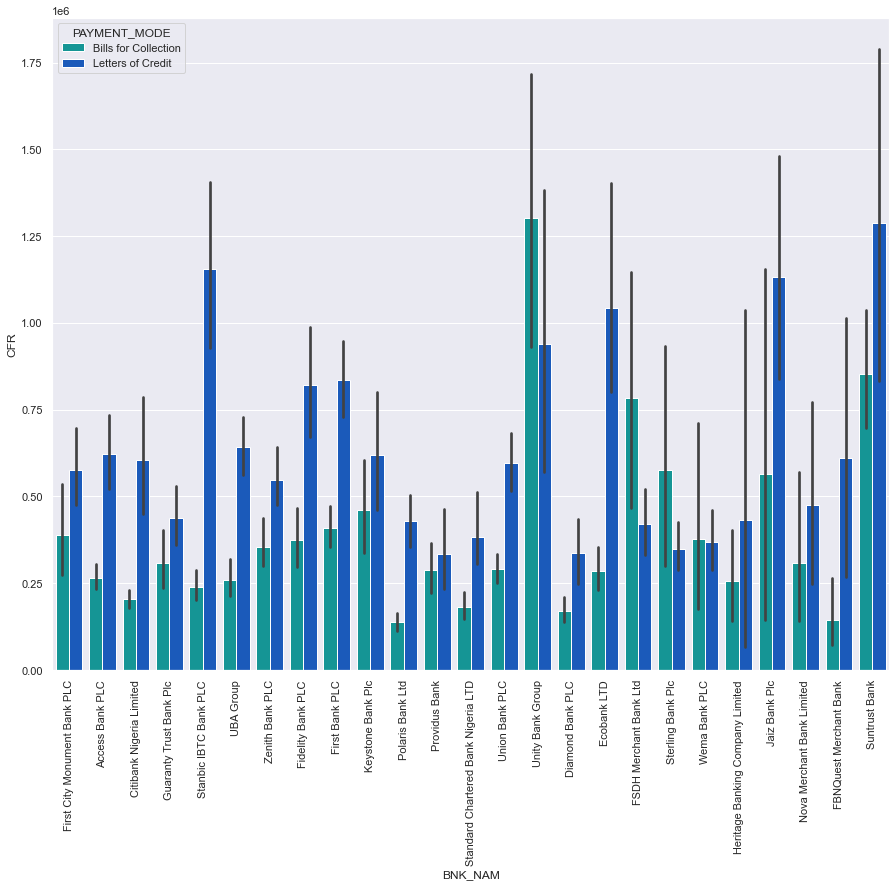

In [46]:
plt.figure(figsize=(15, 12))
sn.set_style(style='darkgrid')
sn.barplot(data=df, x='BNK_NAM', y='CFR', hue="PAYMENT_MODE", palette='winter_r');
plt.xticks(rotation=90);

Remember the first barplot that shows the count of payment mode which shows thats the importers slightly prefer bills for collection than the other. 
And this help broaden our insight that bills for collection might be more common but letters are highly used for for high cost of freight among banks.

Text(0.5, 1.0, 'Relationship between Free on board value and freight value per PAYMENT MODE')

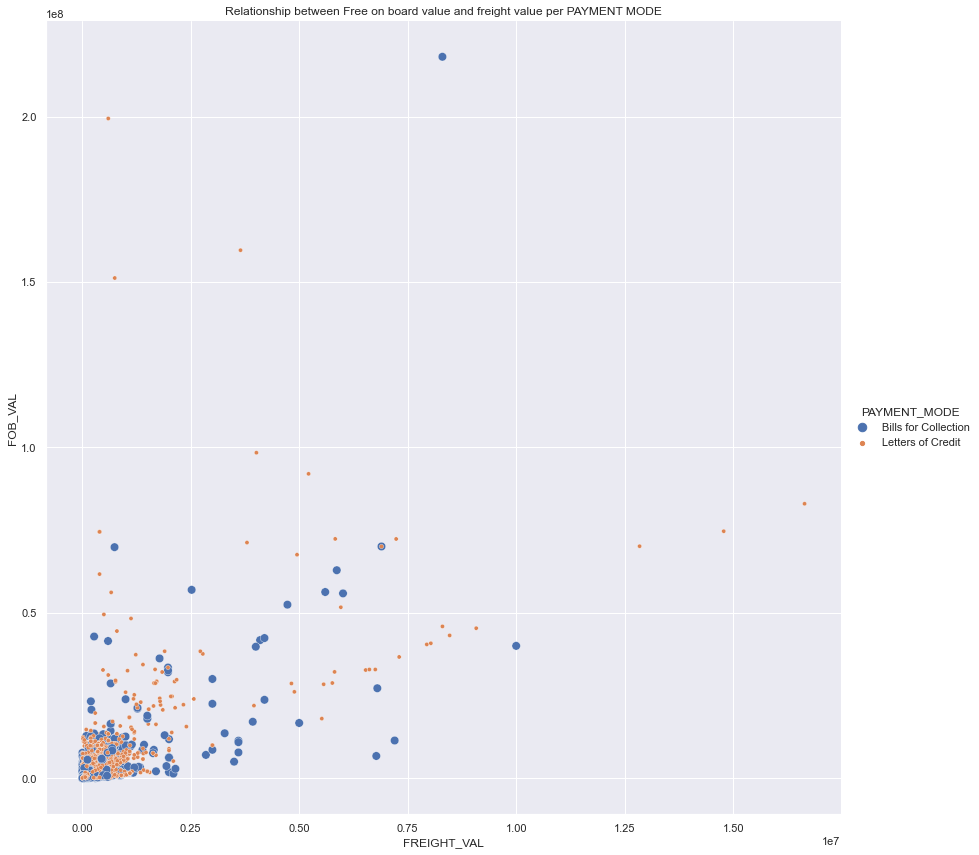

In [47]:
sn.relplot(x='FREIGHT_VAL', y='FOB_VAL', data=df,
           kind='scatter', hue='PAYMENT_MODE', size='PAYMENT_MODE', height=12);
# plt.xscale('log')
# plt.yscale('log')
plt.title('Relationship between Free on board value and freight value per PAYMENT MODE')

There might be a relationship,but the visual doesnt clearly show 

Text(0.5, 1.0, 'Relationship between Free on board value and freight value per PAYMENT MODE')

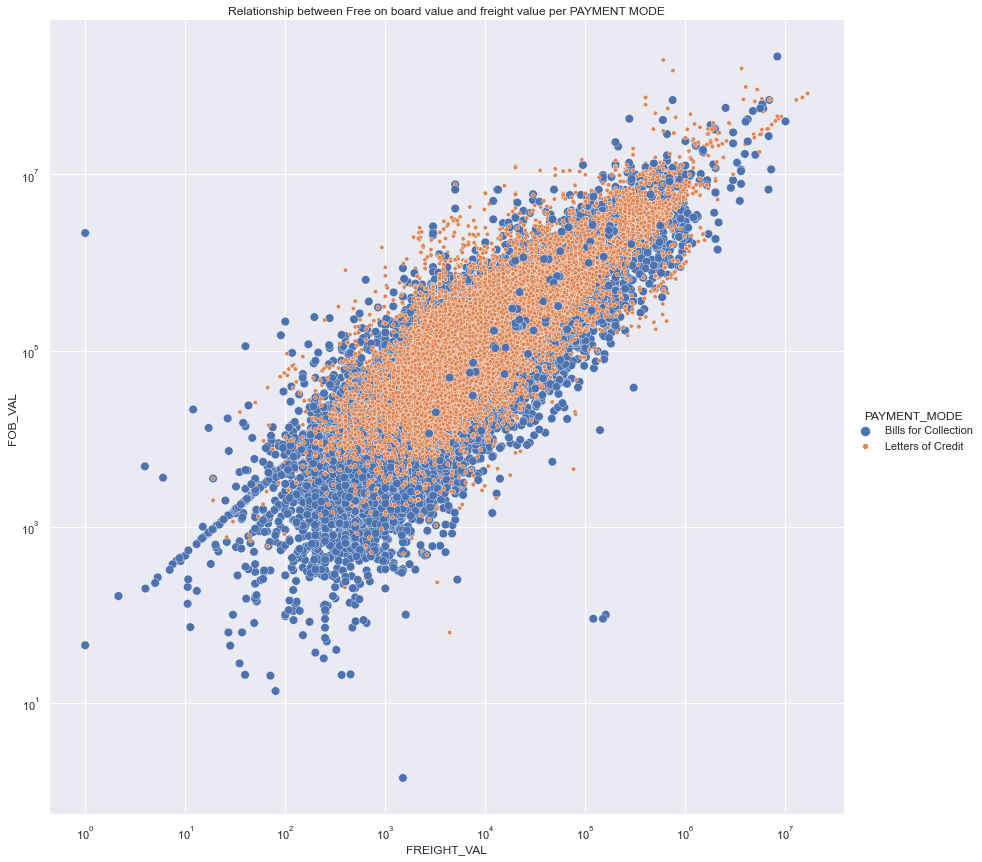

In [48]:
sn.relplot(x='FREIGHT_VAL', y='FOB_VAL', data=df,
           kind='scatter', hue='PAYMENT_MODE', size='PAYMENT_MODE', height=12);
plt.xscale('log')
plt.yscale('log')
plt.title('Relationship between Free on board value and freight value per PAYMENT MODE')

After logging the x and y scale this clearly shows the relationship between the freight value and fob value

In [49]:
df.columns

Index(['S/N', 'BANK_CODE', 'BNK_NAM', 'APP_YEAR', 'AUTHORIZED_DEALER_DATE',
       'EXC_RATE', 'CURRENCY', 'FOB_VAL', 'FREIGHT_VAL', 'CFR', 'USD_EQUIV',
       'PAYMENT_MODE', 'APPLICANT_RCN_CODE', 'APPLICANT_NAME', 'EXPORTER',
       'ITEM', 'FOB_Value_Naira'],
      dtype='object')

<Figure size 1080x864 with 0 Axes>

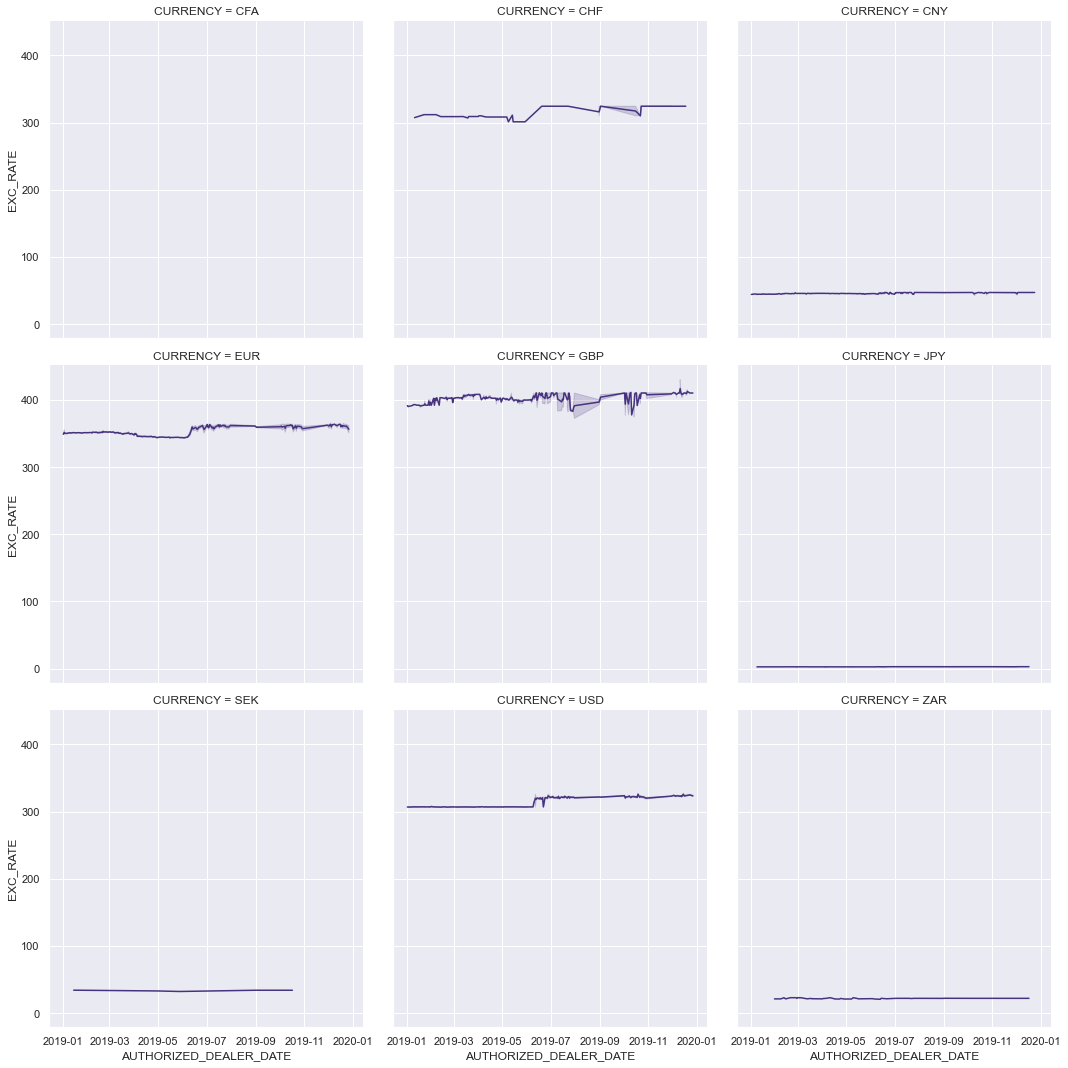

In [50]:
plt.figure(figsize=(15, 12))
sn.set_palette('viridis')
sn.relplot(x='AUTHORIZED_DEALER_DATE', y='EXC_RATE', data=df, 
kind='line', col='CURRENCY', col_wrap=3)

This shows the changes in different currencies over time, this give clear insight on the changes of each currency rate over the specified period 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Yes, for freight and fob value on currency had to add transparency to get a clearly picture of the visualisation and also other aesthetics

### Were there any interesting or surprising interactions between features?

> Yes, after the x and y scale was logged the relationship between and the features were clearer

## Conclusions
>- Although bills for collection for payment mode seems to be more common than letters for credit, but after some further investigations that is true but letters for credit are mostly used for high cost of freight
>- From the exploration it was revealed that there is a strong positive relationship between cost of freight and fob val, that is the higher the cost of freight the higher the fob value, however further analysis can be done to test the significance of the correlation.
